<a href="https://colab.research.google.com/github/Deeksha-Pandit/EVA4-S11/blob/master/S11_Trial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h3>Install Albumentations and Apex libraries</h3>**

In [0]:
%matplotlib inline

In [2]:
!pip install -U git+https://github.com/albu/albumentations
!pip install --no-cache-dir git+https://github.com/NVIDIA/apex

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-sof0259i
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-sof0259i
     |████████████████████████████████| 634kB 3.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=166d320fa61d824cb62f7c0e38843f1124899a968ba21959a52d7514d446bc00
  Stored in directory: /tmp/pip-ephem-wheel-cache-duukunqz/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=7c486c2cc77649202e23614c1a7060781ad196da219ee5b01e94d790a8f6f741
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

**<h3>Mount Drive<h3>**

In [3]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
folder = '/content/gdrive/My Drive/Session11'
sys.path.append(folder)

In [0]:
import torch
import Albumentation
import show_images
import my_model
import train_test
import evaluate
import GradCam
import LR_Range_Test

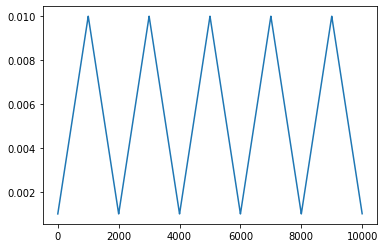

In [6]:
import matplotlib.pyplot as plt
import numpy as np

lr_plot=[]
def CyclicTriangle(iterations,minimum_lr,maximum_lr,step_size):
  for i in range(iterations):
    cycle = np.floor(1+i/(2*step_size))
    x = np.abs((i/step_size)-2*cycle+1)
    lr = minimum_lr + ((maximum_lr-minimum_lr)*(1-x))
    lr_plot.append(lr)
  plt.plot(list(range(iterations)),lr_plot)
CyclicTriangle(iterations=10000,minimum_lr=0.001,maximum_lr=0.01,step_size=1000)

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [7]:
classes, trainloader, testloader = Albumentation.album_Compose.load()

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



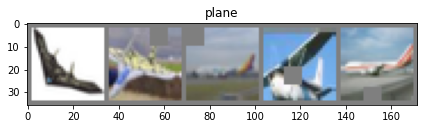

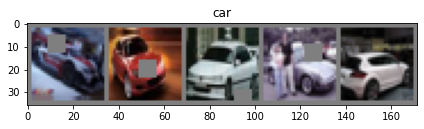

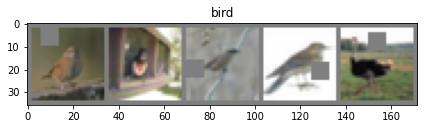

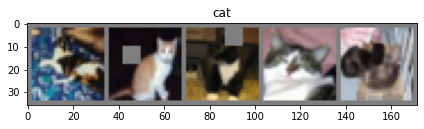

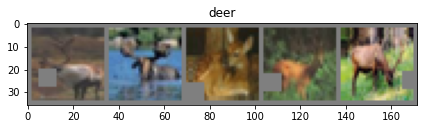

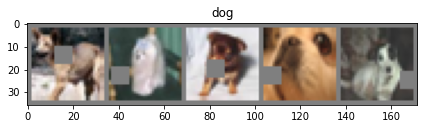

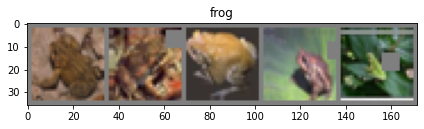

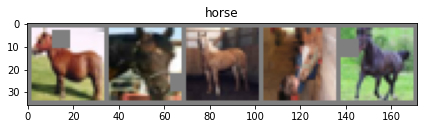

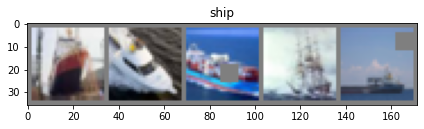

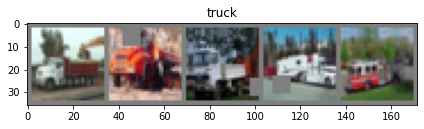

In [8]:
show_images.show_random_images(trainloader, classes)

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
resnet = my_model.ResNet().to(device)
summary(resnet, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

epoch = 1 Lr = 0.001  Loss=1.3555481433868408 Batch_id=97 Accuracy=39.67: 100%|██████████| 98/98 [00:17<00:00,  5.70it/s]
epoch = 2 Lr = 0.0029  Loss=1.2062209844589233 Batch_id=97 Accuracy=46.87: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]
epoch = 3 Lr = 0.0048  Loss=1.1253024339675903 Batch_id=97 Accuracy=44.73: 100%|██████████| 98/98 [00:17<00:00,  5.61it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.0540523529052734 Batch_id=97 Accuracy=45.15: 100%|██████████| 98/98 [00:17<00:00,  5.61it/s]
epoch = 5 Lr = 0.0086  Loss=1.1649366617202759 Batch_id=97 Accuracy=40.92: 100%|██████████| 98/98 [00:17<00:00,  5.63it/s]
epoch = 6 Lr = 0.0105  Loss=1.5807738304138184 Batch_id=97 Accuracy=28.53: 100%|██████████| 98/98 [00:17<00:00,  5.56it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.6469926834106445 Batch_id=97 Accuracy=24.68: 100%|██████████| 98/98 [00:17<00:00,  5.58it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.7394957542419434 Batch_id=97 Accuracy=19.74: 100%|██████████| 98/98 

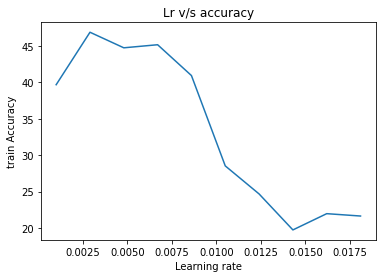

In [10]:
import torch.nn as nn
max_lr = 0.02
min_lr = 0.001
epoch = 10
criterion = nn.NLLLoss()
LR_Range_Test.LR_test(max_lr, min_lr,device,epoch,resnet,criterion,trainloader,momemtum = 0.9,weight_decay=0.05, plot= True )

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

optimizer = optim.SGD(resnet.parameters(), lr=0.01,momentum=0.9,weight_decay=0.005 ) 
criterion = nn.NLLLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.0125, total_steps=None, epochs=24, steps_per_epoch=1, pct_start=0.25, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =1)

In [12]:
train_test.training(resnet,device,trainloader,testloader,optimizer,criterion,24,scheduler)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.00125


Loss=1.271950125694275 Batch_id=97 Accuracy=41.48: 100%|██████████| 98/98 [00:17<00:00,  5.57it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 5514/10000 (55.14%)

EPOCH: 2 LR: 0.0035000000000000005


Loss=0.9045245051383972 Batch_id=97 Accuracy=59.56: 100%|██████████| 98/98 [00:17<00:00,  5.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 6530/10000 (65.30%)

EPOCH: 3 LR: 0.005750000000000001


Loss=0.8509547114372253 Batch_id=97 Accuracy=68.30: 100%|██████████| 98/98 [00:17<00:00,  5.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6960/10000 (69.60%)

EPOCH: 4 LR: 0.008


Loss=0.7454580068588257 Batch_id=97 Accuracy=74.76: 100%|██████████| 98/98 [00:17<00:00,  5.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7488/10000 (74.88%)

EPOCH: 5 LR: 0.01025


Loss=0.550712525844574 Batch_id=97 Accuracy=78.07: 100%|██████████| 98/98 [00:17<00:00,  5.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7781/10000 (77.81%)

EPOCH: 6 LR: 0.0125


Loss=0.551874041557312 Batch_id=97 Accuracy=80.29: 100%|██████████| 98/98 [00:16<00:00,  5.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7699/10000 (76.99%)

EPOCH: 7 LR: 0.011875


Loss=0.4708755910396576 Batch_id=97 Accuracy=83.72: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8102/10000 (81.02%)

EPOCH: 8 LR: 0.011250000000000001


Loss=0.4337179660797119 Batch_id=97 Accuracy=86.29: 100%|██████████| 98/98 [00:17<00:00,  5.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8402/10000 (84.02%)

EPOCH: 9 LR: 0.010625


Loss=0.35407310724258423 Batch_id=97 Accuracy=88.37: 100%|██████████| 98/98 [00:17<00:00,  5.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8473/10000 (84.73%)

EPOCH: 10 LR: 0.01


Loss=0.284496933221817 Batch_id=97 Accuracy=89.47: 100%|██████████| 98/98 [00:16<00:00,  5.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8713/10000 (87.13%)

EPOCH: 11 LR: 0.009375


Loss=0.23994223773479462 Batch_id=97 Accuracy=91.18: 100%|██████████| 98/98 [00:16<00:00,  5.87it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8689/10000 (86.89%)

EPOCH: 12 LR: 0.00875


Loss=0.3160361349582672 Batch_id=97 Accuracy=91.93: 100%|██████████| 98/98 [00:16<00:00,  5.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8691/10000 (86.91%)

EPOCH: 13 LR: 0.008125


Loss=0.22483742237091064 Batch_id=97 Accuracy=93.15: 100%|██████████| 98/98 [00:17<00:00,  5.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8813/10000 (88.13%)

EPOCH: 14 LR: 0.007500000000000001


Loss=0.186287522315979 Batch_id=97 Accuracy=93.86: 100%|██████████| 98/98 [00:16<00:00,  5.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8808/10000 (88.08%)

EPOCH: 15 LR: 0.006875


Loss=0.1815270185470581 Batch_id=97 Accuracy=94.59: 100%|██████████| 98/98 [00:16<00:00,  5.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8810/10000 (88.10%)

EPOCH: 16 LR: 0.0062499999999999995


Loss=0.12206883728504181 Batch_id=97 Accuracy=95.59: 100%|██████████| 98/98 [00:17<00:00,  5.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8918/10000 (89.18%)

EPOCH: 17 LR: 0.005624999999999999


Loss=0.12800277769565582 Batch_id=97 Accuracy=96.07: 100%|██████████| 98/98 [00:17<00:00,  5.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8858/10000 (88.58%)

EPOCH: 18 LR: 0.005


Loss=0.13844197988510132 Batch_id=97 Accuracy=96.61: 100%|██████████| 98/98 [00:17<00:00,  5.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8784/10000 (87.84%)

EPOCH: 19 LR: 0.004375


Loss=0.09843792021274567 Batch_id=97 Accuracy=97.23: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9029/10000 (90.29%)

EPOCH: 20 LR: 0.00375


Loss=0.08928908407688141 Batch_id=97 Accuracy=97.67: 100%|██████████| 98/98 [00:17<00:00,  5.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9016/10000 (90.16%)

EPOCH: 21 LR: 0.0031249999999999993


Loss=0.0670560896396637 Batch_id=97 Accuracy=98.13: 100%|██████████| 98/98 [00:17<00:00,  5.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9042/10000 (90.42%)

EPOCH: 22 LR: 0.0025000000000000005


Loss=0.05016534775495529 Batch_id=97 Accuracy=98.35: 100%|██████████| 98/98 [00:17<00:00,  5.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9086/10000 (90.86%)

EPOCH: 23 LR: 0.001875


Loss=0.05678762122988701 Batch_id=97 Accuracy=98.66: 100%|██████████| 98/98 [00:17<00:00,  5.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9115/10000 (91.15%)

EPOCH: 24 LR: 0.0012499999999999994


Loss=0.06132565066218376 Batch_id=97 Accuracy=98.89: 100%|██████████| 98/98 [00:17<00:00,  5.74it/s]



Test set: Average loss: 0.0005, Accuracy: 9154/10000 (91.54%)



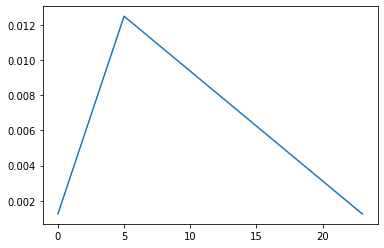

In [13]:
plt.plot(train_test.LR_list)

In [14]:
evaluate.evaluate_accuracy(resnet, device, testloader)

Accuracy of the network on the 10000 test images: 91.540 %


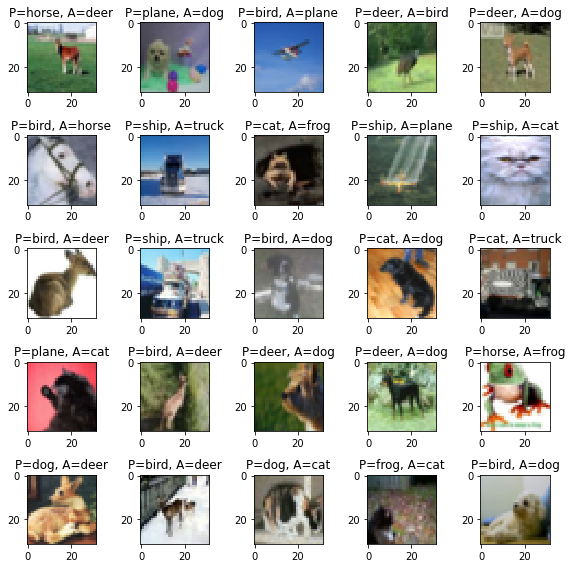

In [15]:
misclassified_images = evaluate.show_misclassified_images(resnet, device, testloader, classes)

In [16]:
evaluate.evaluate_classwise_accuracy(resnet, device, classes, testloader)

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 66 %
Accuracy of   cat : 90 %
Accuracy of  deer : 100 %
Accuracy of   dog : 90 %
Accuracy of  frog : 77 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


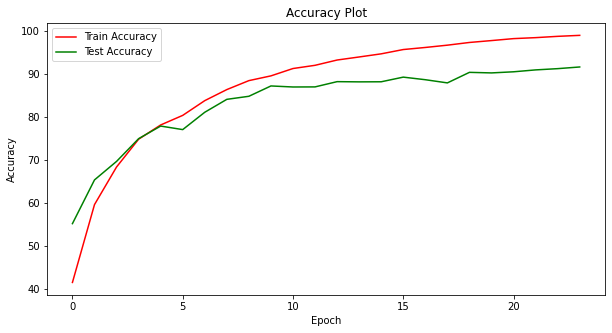

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.plot(train_test.train_acc_epoch_end,color = 'r',label="Train Accuracy")
ax.plot(train_test.test_acc,color = 'g',label="Test Accuracy")
ax.set(title="Accuracy Plot", xlabel="Epoch", ylabel="Accuracy")
ax.legend()
plt.show()

NameError: ignored

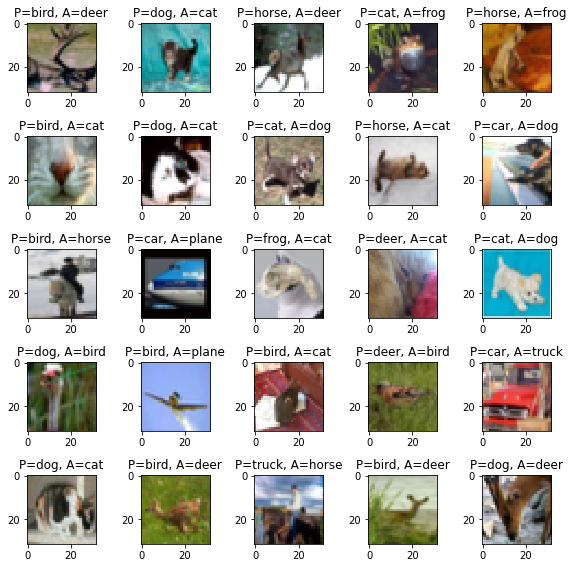

<Figure size 1224x576 with 0 Axes>

In [18]:
layers = [resnet.ResBlock_R2]
miscalssified_images = evaluate.show_misclassified_images(resnet, device, testloader, classes)
GradCam.GradCAM.GradCamPlot(miscalssified_images,resnet,classes,layers,Figsize = (17,8),subplotx1 = 5, subplotx2 = 5)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from torchvision.utils import make_grid, save_image
fig = plt.figure(figsize=(23,30))
for i,k in enumerate(misclassified_images):
  images1 = [misclassified_images[i][0].cpu()/2+0.5]
  images2 =  [misclassified_images[i][0].cpu()/2+0.5]
  b = resnet.to(device)
  # output = model(misclassified_images[i][0])
  # _, predicted = torch.max(output.data, 1)
  #print(classes[int(predicted)])
  layers =  [resnet.convblock1,resnet.layer2)#,resnet.convblock2,resnet.ResBlock_R2]
  for j in layers:
    g = GradCam.GradCAM(b,j)
    mask, _= g(misclassified_images[i][0].clone().unsqueeze_(0))
    heatmap, result = GradCam.GradCAM.visualize_cam(mask,misclassified_images[i][0].clone().unsqueeze_(0)/2+0.5 )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2,nrow=6,pad_value=1)
  npimg = grid_image.numpy()
  sub = fig.add_subplot(9, 3, i+1) 
 
  # fig.subplots_adjust(wspace=0)
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  sub.set_title('P = '+classes[int(misclassified_images[i][1])]+" A = "+classes[int(misclassified_images[i][2])],fontweight="bold",fontsize=18)
  sub.axis("off")
plt.tight_layout()
fig.subplots_adjust(wspace=0)